## 2nd Model type: Classification

* What if we don't want numbers but classes?
  * Cars, weekdays, emotions, etc.

**[Study here](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)**

## Example: decision tree classifier

![](images/decision-tree.png)

## Example: predicting flower classes

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

iris = load_iris()

print(type(iris))
print(iris.keys())
X = iris.data # features 
y = iris.target # result or classification

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [1]:
# column 0-3 are the 4 variables: sepal_length, sepal_width, petal_length, petal_width - column 4 is the classification ('setosa', 'versicolor' or 'virginica')
import pandas as pd
pd.read_csv('data/iris.csv',header=None, skiprows=1)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
y[48:52] # target or classification

array([0, 0, 1, 1])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
# internal nodes = features, leaf_nodes = target (outcome), branch = decision rule
model = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [20]:
p = model.predict([[6.1, 2.8, 4. , 1.3]])
iris.target_names[p][0]

'versicolor'

In [23]:
# Determine accuracy of model prediction (0 to 1, where 1 is 100% correct prediction)
y_predicted = model.predict(X_test)
accuracy_score(y_test,y_predicted)

0.9333333333333333

[Confusion matrix](https://machinelearningmastery.com/confusion-matrix-machine-learning/) for measuring model precision

## Install graphviz
https://rdrr.io/cran/ndtv/man/install.graphviz.html

## What model was created for the categorization of iris flowers:

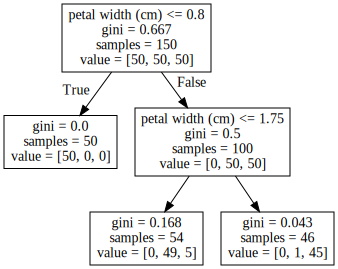

In [9]:
# After fitting 4 variables and a target 150 times the model looks like this:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG
graph = Source( export_graphviz(model, out_file=None, feature_names=iris.feature_names))
SVG(graph.pipe(format='svg'))
# gini: a statistical measure of the degree of variation represented in a set of values (like distribution)

## Sklearn

https://scikit-learn.org/stable/index.html

## Exercise decision tree
Use a dataset with 3 labels: L, R, B (left, right, balanced) Given 4 input values predict the outcome (Label). Dataset is a matrix with shape (625,5) ala:
```python
B  1  1  1  1
R  1  1  1  2
R  1  1  1  3
L  1  1  1  4
```
1. Importing the required packages 
```python
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
```
2. Import dataset: `https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data`
  -  Balance Scale Weight & Distance
3. Split dataset (input variables and target) Hint: first column is the target
4. Split dataset into training data and test data using train_test_split()
5. Create a model (DecisionTreeClassifier(criterion = "gini", random_state=100,max_depth=3, min_samples_leaf=5)
6. Fit model with training data
7. Make predictions on test data (using  predicted_y = prediction(X_test, model))
8. Calculate model accuracy with cal_accuracy(y_test, predicted_y) 

[If you get stuck see solution](https://www.geeksforgeeks.org/decision-tree-implementation-python/)

## Exercise with linear regression

* Import [data](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) using `sklearn.datasets.load_diabetes`
```python
from sklearn.datasets import load_diabetes
X = load_diabetes().data
Y = load_diabetes().target
```
* Construct a `sklearn.linear_model.LinearRegression` model
* Fit it with the data
* What is the predicted disease progression given this input?
```python
[ 0.01628068, -0.04464164,  0.01750591, -0.02288496,  0.06034892,
  0.0444058 ,  0.03023191, -0.00259226,  0.03723201, -0.0010777 ]
```